<picture>
        <img src="https://th.bing.com/th/id/OIP.8F4PVZjbvDFaEl7w4L7AYwHaHa?w=171&h=180&c=7&r=0&o=5&dpr=1.8&pid=1.7" width="30" height="30">
</picture>


# Smoking Kills


## -- An Analysis of Smoking & Chronic Disease through CDC Data 


# Table of Contents

* [1. Introduction](#chapter1)
* [2. Research Questions](#chapter2)
* [3. Objectives](#chapter3)
* [4. Data](#chapter4)
    * [4.a Scraping Data](#section_4_1)
        * [4.a.1 Smoking Data](#section_4_1_1)
        * [4.a.2 Cardiovascular Disease data](#section_4_1_2)
        * [4.a.3 Pulmonary Disease data](#section_4_1_3)
        * [4.a.4 Cancer Data](#section_4_1_4)
    * [4.b Cleaning Data](#section_4_2)
* [5. Visualizing Data](#chapter5)
    * [5.a Objective1: What makes adults smoke more cigarette?](#section_5_1)
        * [5.a.1) Smoker Category](#section_5_1_1)
        * [5.a.2) Impact of age, location, gender, education, race on people's smoking behavior](#section_5_1_2)
        * [5.a.3) Adults Smoking Behavior Trend Over Years](#section_5_1_3)
    * [5.b Objective2: Relationship between Cigarette Smoking and Chronic Disease](#section_5_2)
        * [5.b.1) Smoking vs Cardiovascular Disease](#section_5_2_1)
        * [5.b.2) Smoking vs Pulmonary Disease](#section_5_2_2)
        * [5.b.3) Smoking vs Cancer Disease](#section_5_2_3)
        * [5.b.4) Relation among smoking and 3 diseases](#section_5_2_4)
* [6. Conclusion](#chapter6)

<code style="background:yellow;color:black"> Packages needed to run this notebook</code>

In [1]:
# import necessary packages
import pandas as pd
import pandas_datareader.data as web
import numpy as np

import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly
import plotly.graph_objects as go
import plotly.express as px

from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import requests
from bs4 import BeautifulSoup
import pickle
import json
import datetime as dt
import os
import re
from sodapy import Socrata
import missingno as msno
import time
import warnings
warnings.filterwarnings("ignore")
path = ""

<h1>1. Introduction</h1> <a class="anchor" id="chapter1"></a>

Since Cigarette smoking harms nearly every organ of the body, causes many diseases, and reduces the health of smokers in general. Cigarette smoking causes more than 480,000 deaths each year in the United States. This is nearly one in five deaths. The risk of dying from cigarette smoking has increased over the last 50 years in the U.S. Because of Cigarettes' dangerous elements: 1 Carcinogens. 2 Toxic Metals. 3 Radioactive Toxic Metals. 4 Poisons. 5 Secondhand, smoke are at greater risk for diseases that affect the heart and blood vessels (cardiovascular disease). Smoking causes stroke and coronary heart disease, which are among the leading causes of death in the United States. Even people who smoke fewer than five cigarettes a day can have early signs of cardiovascular disease. Smoking damages blood vessels and can make them thicken and grow narrower. This makes your heart beat faster and your blood pressure go up. Clots can also form. Therefore, in another word, Smoking Kills. 

Globally, there are 1.1 billion adult smokers, 60% of them want or intend to quit. Much has been written and said about the potential of electronic nicotine delivery systems (ENDS) such as e-cigarettes to help tobacco users quit. While the evidence is still inconclusive, e-cigarettes are often used along with one or more tobacco products. Therefore, in order to weigh the potential benefits and risks of e-cigarettes for the population, there are two obstacles:
   1. Regarding the potential health effects,  there is insufficient data to understand the full breadth of their impact on health as devices have not been on the market long enough
   2. It is of particular public health concern that increasingly children and adolescents take up the use of e-cigarettes in some countries. Exposing children and adolescents to nicotine can have long-lasting, damaging effects on brain development and lead to nicotine addiction.
   
Considering those obstacles for E-cigarette and all of those facts about the smoking motivated us to analyse the impacts of cigarettes.

<h1>2. Research Questions</h1> <a class="anchor" id="chapter2"></a>
1. Is there a relationship between Cigarette use/smoking habits and gender, education or living location?  <br>
2. What are the impacts of smoking on human's health, including pulmonary disease, heart-related chronic disease(Cardiovascular Diseases) and cancer, etc? <br>


<h1>3. Objectives</h1> <a class="anchor" id="chapter3"></a>
1. Seek to find out the implicit pattern/relationship behind the Smoking dataset. We want to analyze and evaluate people's age, gender, geographical location, education to explore the implications of people's smoking habits <br>
2. With Smoking data, and various indicator of three disease data, we want to evaluate the implications and potential impacts of people's smoking habits on the heart diease, pulmonary disease and cancer rates.  <br>

<h1>4. Dataset</h1> <a class="anchor" id="chapter4"></a>

The data to be analysed in this notebook consists of:

<b>Smoking data:</b>  consists of State Tobacco Activities data taken from 2011-2019. Tobacco topics included are cigarette and e-cigarette use prevalence by demographics, cigarette and e-cigarette use frequency, and quit attempts. The BRFSS is a continuous, state-based surveillance system that collects information about modifiable risk factors for chronic diseases and other leading causes of death. The data for the STATE System were extracted from the annual BRFSS surveys from participating states. For estimates among racial and ethnic subgroups, two-year combined data are available. Sample sizes of less than 50 were considered to be inadequate for data analysis. The STATE System does not display percentages for these sample sizes; instead, "NA" will appear in the percentage box for that demographic group. 

|    |   year | locationdesc   | topicdesc                      | measuredesc                                  | data_value_type   |   data_value |   data_value_std_err |   low_confidence_limit |   high_confidence_limit |   sample_size | gender   | race                          | age            | education   |
|---:|-------:|:---------------|:-------------------------------|:---------------------------------------------|:------------------|-------------:|---------------------:|-----------------------:|------------------------:|--------------:|:---------|:------------------------------|:---------------|:------------|
|  0 |   2019 | Alabama        | Cessation (Adults)             | Percent of Former Smokers Among Ever Smokers | Percentage        |         56.8 |                  1.7 |                   53.5 |                    60.1 |          1431 | Male     | All Races                     | All Ages       | All Grades  |
|  1 |   2019 | Alabama        | Cigarette Use (Adults)         | Current Smoking                              | Percentage        |         21.7 |                  1.1 |                   19.6 |                    23.8 |          2453 | Overall  | All Races                     | 45 to 64 Years | All Grades  |
|  2 |   2019 | Alabama        | Smokeless Tobacco Use (Adults) | Current Use                                  | Percentage        |          7.8 |                  3.2 |                    1.6 |                    14   |            97 | Overall  | American Indian/Alaska Native | All Ages       | All Grades  |


<b>There are 4 topics in total and various measures for each topic, and here is the Definition of different measures in each topic </b>

<table>
    <tr>
        <td><b>Topic Description</b></td>
        <td><b>Measure Description</b></td>
        <td></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>Cigarette Use (Adults)</td>
        <td>Current Smoking</td>
        <td></td>
        <td>"Persons who reported ever smoking at least 100 cigarettes and who currently smoke every day or on some days. </td>
    </tr>
    <tr>
        <td>Cigarette Use (Adults)</td>
        <td>Current Smoking – (2 yrs – Race/Ethnicity)</td>
        <td></td>
        <td>Combining two consecutive years of survey data and stratifying by race, persons who reported ever smoking at least 100 cigarettes and who currently smoke every day or some days.</td>
    </tr>
    <tr>
        <td>Cigarette Use (Adults)</td>
        <td>Smoking Frequency</td>
        <td></td>
        <td>How often a current smoker engages in smoking, either every day or some days.</td>
    </tr>
    <tr>
        <td>Cigarette Use (Adults)</td>
        <td>Smoking Status</td>
        <td></td>
        <td>"Current Smokers - Persons who reported ever smoking at least 100 cigarettes and who currently smoke every day or some days.
            Former Smokers - Persons who reported ever smoking at least 100 cigarettes but who do not currently smoke.
            Never Smokers - Persons who reported having never smoked 100 cigarettes in their lifetime."
        </td>
    </tr>
    <tr>
        <td>Cessation (Adults)</td>
        <td>Percent of Former Smokers Among Ever Smokers</td>
        <td></td>
        <td>Among persons who have ever smoked cigarettes, those who do not currently smoke cigarettes.</td>
    </tr>
    <tr>
        <td>Cessation (Adults)</td>
        <td>Quit Attempt in Past Year Among Every Day Cigarette Smokers</td>
        <td></td>
        <td>"Among every day smokers, those who quit smoking for one day or more.</td>
    </tr>
    <tr>
        <td>E-Cigarette Use (Adults)</td>
        <td>Current Use</td>
        <td></td>
        <td>"Persons who reported ever using an e-cigarette or other electronic “vaping” product, even just one time, in their entire life and who currently use every day or on some days. </td>
    </tr>
    <tr>
        <td>E-Cigarette Use (Adults)</td>
        <td>Current Use – (2 yrs – Race/Ethnicity)</td>
        <td></td>
        <td>Combining two consecutive years of survey data and stratifying by race, persons who reported ever using an e-cigarette or other electronic “vaping” product, even just one time, in their entire life and who currently use every day or on some days.</td>
    </tr>
    <tr>
        <td>E-Cigarette Use (Adults)</td>
        <td>Frequency of Use</td>
        <td></td>
        <td>How often a current user engages, either every day or some days.</td>
    </tr>
    <tr>
        <td>E-Cigarette Use (Adults)</td>
        <td>User Status</td>
        <td></td>
        <td>"Current Users - Persons who reported ever using an e-cigarette and who currently smoke every day or some days.
        Former Users - Persons who reported ever using an e-cigarette but who do not currently use e-cigarettes.
        Never Users - Persons who reported having never used an e-cigarette."</td>
    </tr>
    <tr>
        <td>Smokeless Tobacco Use (Adults)</td>
        <td>Current Use</td>
        <td></td>
        <td>"Persons who reported currently using chewing tobacco, snuff, or snus every day or on some days.  Respondents who answered ""don't know"" or who refused to answer were excluded from the analysis, as were respondents with missing current use information.  </td>
    </tr>
    <tr>
        <td>Smokeless Tobacco Use (Adults)</td>
        <td>User Status</td>
        <td></td>
        <td>"Current Users - Persons who reported currently using smokeless tobacco every day or some days.
        Not Current Users - Persons who reported not currently using smokeless tobacco."</td>
    </tr>
    <tr>
        <td>Smokeless Tobacco Use (Adults)</td>
        <td>Current Use – (2 yrs – Race/Ethnicity)</td>
        <td></td>
        <td>Combining two consecutive years of survey data and stratifying by race, persons who reported currently using chewing tobacco, snuff, or snus every day or on some days.</td>
    </tr>
    <tr>
        <td>Smokeless Tobacco Use (Adults)</td>
        <td>Frequency of Use</td>
        <td></td>
        <td>How often a current user engages, either every day or some days.</td>
    </tr>
</table>




<b>Heart Disease data:</b> consists of Heart Disease Mortality data from US adults who are over 35 years old, and data is categorized by geographic location county, state, nation. The data also categorized by gender. Data value is described the number of heart disease mortality cases per 100,000 population, and the specific class of heart disease is Cardiovascular Diseases. Data was obtained using the Socrata API.

|    |   year | locationabbr   | locationdesc   | geographiclevel   | datasource   | class                   | topic                   |   data_value | data_value_unit        | data_value_type                                       | stratificationcategory1   | stratification1   | stratificationcategory2   | stratification2   | topicid   |   locationid | location_1                                            |   :@computed_region_bxsw_vy29 |   :@computed_region_he4y_prf8 | data_value_footnote_symbol   | data_value_footnote   |
|---:|-------:|:---------------|:---------------|:------------------|:-------------|:------------------------|:------------------------|-------------:|:-----------------------|:------------------------------------------------------|:--------------------------|:------------------|:--------------------------|:------------------|:----------|-------------:|:------------------------------------------------------|------------------------------:|------------------------------:|:-----------------------------|:----------------------|
|  0 |   2014 | AK             | Aleutians East | County            | NVSS         | Cardiovascular Diseases | Heart Disease Mortality |        105.3 | per 100,000 population | Age-adjusted, Spatially Smoothed, 3-year Average Rate | Gender                    | Overall           | Race/Ethnicity            | Overall           | T2        |        02013 | {'latitude': '55.440626', 'longitude': '-161.962562'} |                            51 |                           107 | nan                          | nan                   |
|  1 |   2014 | AK             | Aleutians West | County            | NVSS         | Cardiovascular Diseases | Heart Disease Mortality |        211.9 | per 100,000 population | Age-adjusted, Spatially Smoothed, 3-year Average Rate | Gender                    | Overall           | Race/Ethnicity            | Overall           | T2        |        02016 | {'latitude': '52.995403', 'longitude': '-170.251538'} |                           nan |                           nan | nan                          | nan                   |
|  2 |   2014 | AK             | Anchorage      | County            | NVSS         | Cardiovascular Diseases | Heart Disease Mortality |        257.9 | per 100,000 population | Age-adjusted, Spatially Smoothed, 3-year Average Rate | Gender                    | Overall           | Race/Ethnicity            | Overall           | T2        |        02020 | {'latitude': '61.159049', 'longitude': '-149.103905'} |                            51 |                          1669 | nan                          | nan                   |


<b>Pulmonary data:</b> consists of one important chronic disease indicator: Pulmonary disease rate, described by year, states of U.S. Theoretically, there are close relationship between smoking disease and lung disease like pulmonary disease, since lung disease generated from smoking can affect airways, Air Sacs (Alveoli),the Interstitium, and the Blood Vessels, which could all stimulate the pulmonary disease. Data was obtained using the Socrata API.


<b>Cancer data:</b> consists of one important chronic disease indicator: cancer rate, described by year, states of U.S. CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data. Data was obtained using the Socrata API. As you can see in the picture below, indicating Smoking may be a potential source that results cancer. 

<img src="Cancer.png" />

<h2> a. Scraping the data </h2> <a class="anchor" id="section_4_1"></a>

<p> This section includes explanations and code with details on how the various datasets were scraped.</p>

### Smoking data <a class="anchor" id="section_4_1_1"></a>

<p> This data is obtained from Centers for Disease Control and Prevention (CDC) by using Socrata API (https://dev.socrata.com/docs/endpoints.html). Though we can access this Dataset via SODA API, which is The Socrata Open Data API (SODA) provides programmatic access to this dataset, we still have restricted free developer accounts, which limited us to only 1000 rows per record. These limitations are significant when the original smoking dataset is more than 40000 rows. In order to solve this problem, alternative scraping methods were utilised to obtain the smoking data. Sodapy's Socrata (https://pypi.org/project/sodapy/) is used as an aid to scrape all rows. In summary, this package can help me to integrate with Pandas to work with JSON data. This library supports writing directly to datasets with the Socrata Open Data API. Given the required information like client token and , it scrapes Smoking data and metadata directly from the browser. After Installing the required package, the smoking data is firstly saved to the pickle to keep track of the original data. 
    

</p>

In [5]:
# Scraping Smoking Data From Socrata API embedded in CDC
client = Socrata("chronicdata.cdc.gov", None)
results = client.get("wsas-xwh5", limit=50000)

# Convert to pandas DataFrame
df1 = pd.DataFrame.from_records(results)

#saving data to pickle
df1.to_pickle('df1.pkl')

### Cardiovascular Disease data <a class="anchor" id="section_4_1_2"></a>

<p>
    Heart Disease data can also scraped from the Socrata API. Since 2013-2018's full heart disease data are separately placed in different dataset in CDC. Therefore, this process will be a little bit time-killing since We need to scraped the data from 6 locations and then combine them into a single dataframe. 
</p>


In [6]:
# Scraping Heart Disease Data From Socrata API embedded in CDC
API_endpoint = ["https://chronicdata.cdc.gov/resource/r35g-znws.json", "https://chronicdata.cdc.gov/resource/i2vk-mgdh.json", 
                "https://chronicdata.cdc.gov/resource/48mw-5apu.json","https://chronicdata.cdc.gov/resource/mfvi-hkb9.json",
                "https://chronicdata.cdc.gov/resource/6x7h-usvx.json","https://chronicdata.cdc.gov/resource/s6p7-fvbw.json"]

#getting the unique API code for each dataset
APIcode = [re.findall(r"[a-z1-9]{4}-[a-z1-9]{4}",i) for i in API_endpoint]

APIcodeli = []
for i in APIcode:
    APIcodeli.append(' '.join([str(element) for element in i]))

df2 = pd.DataFrame()
for i in APIcodeli:
    client = Socrata("chronicdata.cdc.gov", None)
    results = client.get(str(i), limit=100000)
    resultsdf1 = pd.DataFrame.from_records(results)
    
    # initial data clean for later merge
    # drop unwanted columns
    resultsdf1.drop(['datasource', 'data_value_type','datasource','data_value_unit',
                     'stratificationcategory1','stratificationcategory2','topicid',
                     'locationid','topic','data_value_footnote_symbol','data_value_footnote'],
                    axis = 1,inplace=True)
    
    # Setting race=overall, since we do not need this variable in our analysis
    resultsdf1 = resultsdf1[resultsdf1.stratification2 == "Overall"]
    resultsdf1.drop(['stratification2'], axis = 1,inplace=True)
    resultsdf1.rename(columns={'stratification1':'gender'},inplace=True)
    
    # combine the data into the single dataframe
    df2 = pd.concat([df2,resultsdf1], axis=0)
    
    # wait for 5 seconds to follow the strict throttling limits
    time.sleep(5)
    
#saving data to pickle
df2.to_pickle('df2.pkl')

### Pulmonary Disease data <a class="anchor" id="section_4_1_3"></a>

The following two datasets are acquired in a similar way to that of smoking data, under the help of Socrata API.

In [7]:
client_p = Socrata("chronicdata.cdc.gov", None)
results_p = client_p.get("aqr6-8kj8", limit=130000)
p_df = pd.DataFrame.from_records(results_p)
#saving data to pickle
p_df.to_pickle('df3.pkl')

### Cancer data <a class="anchor" id="section_4_1_4"></a>

In [8]:
client_c = Socrata("chronicdata.cdc.gov", None)
results_c = client_c.get("u9ek-bct3", limit=150000)
c_df = pd.DataFrame.from_records(results_c)
c_df.to_pickle("df4.pkl")

<h2>b. Initial data cleaning</h2> <a class="anchor" id="section_4_2"></a>

At this step we carry out some general data cleaning process as listed below, and further cleaning using more advanced dataframe functionality will be performed at the appropriate stage when we do the visulisation.

The following steps are carried out during the initial data clean:

1. Drop unwanted columns
2. Drop NAs accordingly
3. Drop duplicate rows that arise as a result of an overlap in all records.
4. convert all columns into appropriate data types


Since there are many columns are that are used by Data providers' internal use, and an unique row can be identified by their geographical location, combination of (topic, measure). Initial analysis has shown that the scraping produced several columns with the same ID and theose ID columns are not useful for our analysis, for this reason I drop the ID column and sorted in chronological order. Different versions of the core dataframe are required for different visualisations of the data. The initial data clean is done in this section, and further ad hoc data pivots, groupbys and other cleaning methods are performed throughout the notebook.

### smoking data cleaning

(43341, 33)


data_value_footnote            41224
data_value_footnote_symbol     41224
response                       28323
sample_size                     2195
low_confidence_limit            2195
data_value_std_err              2195
high_confidence_limit           2195
data_value                      2117
:@computed_region_bxsw_vy29     1701
:@computed_region_he4y_prf8      909
geolocation                       78
topictype                          0
topicdesc                          0
locationdesc                       0
datasource                         0
dtype: int64

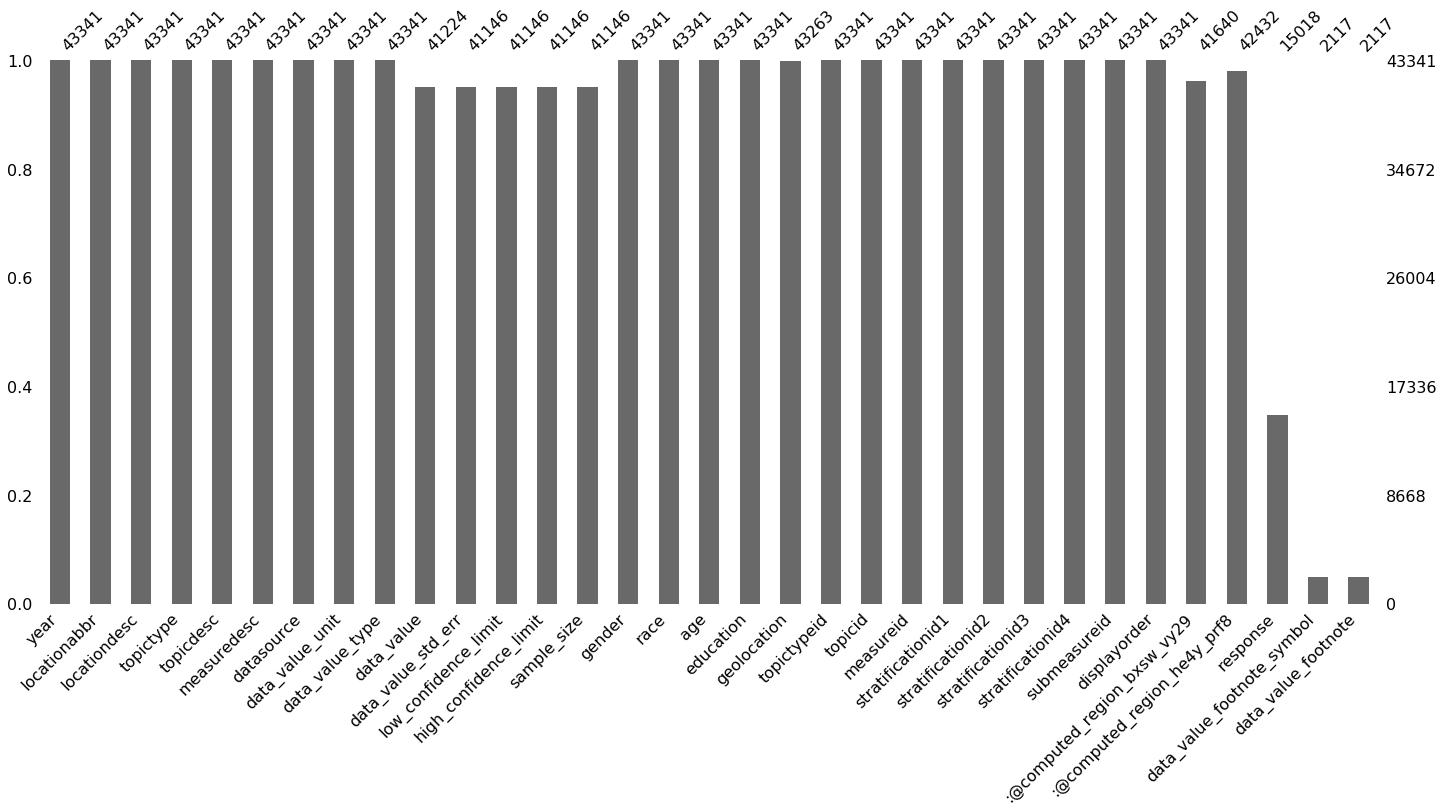

In [9]:
#read data from pickle
raw = pd.read_pickle('df1.pkl')
#check out the missing values in the raw data.
print(raw.shape)
display(raw.isna().sum().sort_values(ascending=False).head(15))
# Gives a bar chart of the missing values
msno.bar(raw);

We can find there are two columns 'data_value_footnote' and 'data_value_footnote_symbol' which are almost empty, and some other columns such as geolocation are useless to our analysis. For the above missing value count, all columns with missing values are meaningless to our later visulisation except **'sample_size'** and **'data_value'**. We observe the two variables have similar number of missing values, since the data_value is the percentage of tobacco consumption type for various sample_size, it is intuitive that missing sample_size will surely lead to missing data_value. We quickly check this:

In [4]:
print("Number of NAs in sample_size: 2195")
print("Number of NAs in data_value: 2117")
print(f"Number of NAs in both: {raw[raw.sample_size.isna() & raw.data_value.isna()].shape[0]}")

Number of NAs in sample_size: 2195
Number of NAs in data_value: 2117
Number of NAs in both: 2117


However, there is still a descriptive column **'response'** with more than 28000 missing values. Referred to the previous definition of measures, this column only responds to status or fequency. And it is reasonable to be NA for current smoking measure. Hence we should only drop those rows with NAs in **sample_size** and **data_value**. 

In [25]:
# Data Cleaning, Initial Steps
# 1. drop unwanted columns
raw.drop(['topictype','datasource','data_value_unit','stratificationid1',
          'stratificationid2','stratificationid3','stratificationid4','submeasureid',
          'displayorder','topictypeid','topicid','measureid',':@computed_region_bxsw_vy29',
          ':@computed_region_he4y_prf8','data_value_footnote_symbol','data_value_footnote',
          'geolocation'], axis = 1,inplace=True)

# 2. Drop rows with NAs in sample_size and data_value
#raw.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 
raw = raw.loc[raw.sample_size.notna() & raw.data_value.notna()]

# 3. drop duplicate rows
raw = raw.drop_duplicates(['year','locationdesc','topicdesc','measuredesc',
                           'sample_size','gender','age','education'])

# 4. change column data type
columns = ['data_value', 'data_value_std_err', 'low_confidence_limit', 
           'high_confidence_limit','sample_size']
for x in columns:
    raw[x] = raw[x].astype('float')


raw = raw.sort_values(by=["year"], axis=0, ascending=True)
raw.reset_index(drop=True, inplace=True)
raw.to_pickle('cleaned_df1.pkl')
print(raw.shape)
raw.head()

(33140, 16)


year locationabbr          locationdesc                       topicdesc  \
0  2011           WY               Wyoming          Cigarette Use (Adults)   
1  2011           DC  District of Columbia  Smokeless Tobacco Use (Adults)   
2  2011           DC  District of Columbia  Smokeless Tobacco Use (Adults)   
3  2011           DC  District of Columbia          Cigarette Use (Adults)   
4  2011           DC  District of Columbia  Smokeless Tobacco Use (Adults)   

       measuredesc data_value_type  data_value  data_value_std_err  \
0  Current Smoking      Percentage        16.7                 0.9   
1      Current Use      Percentage         2.6                 1.0   
2      Current Use      Percentage         0.6                 0.3   
3  Current Smoking      Percentage        17.2                 1.8   
4      Current Use      Percentage         1.6                 1.3   

   low_confidence_limit  high_confidence_limit  sample_size   gender  \
0                  14.9                   18.5       4235.0  Overall   
1                   0.7                    4.5        733.0  Overall   
2                   0.1                    1.1       1998.0  Overall   
3                  13.6                   20.8        737.0   Female   
4                   0.0                    4.1        184.0  Overall   

        race               age     education response  
0  All Races  Age 20 and Older  > 12th Grade      NaN  
1  All Races  Age 25 and Older    12th Grade      NaN  
2      White          All Ages    All Grades      NaN  
3  All Races    18 to 44 Years    All Grades      NaN  
4   Hispanic          All Ages    All Grades      NaN

As we can see in this descriptive statistics for 2 main columns "data_value" and "sample_size", sample_size appears to have huge standard deviation, which means the various sample results are collected from small samples. We had better to involve this information in later analysis when we calculate the number of people that are exposed to smoking. 

In [6]:
round(raw.describe(exclude = 'object')[['data_value','sample_size']], 2)

data_value  sample_size
count    33140.00     33140.00
mean        21.18      2870.26
std         22.32      3730.35
min          0.00        50.00
25%          4.40       462.75
50%         13.30      1604.00
75%         28.20      3823.25
max         99.80     40726.00

### Cardiovascular data cleaning

In [27]:
# Data Cleaning for Heart Disease Data
df2 = pd.read_pickle('df2.pkl')
print(f'Original Shape:{df2.shape}')

# 1. drop unwanted columns
df2.drop(['location_1','class',':@computed_region_he4y_prf8',
          ':@computed_region_bxsw_vy29','y_lat','x_lon','geocoded_column'], 
         axis = 1,inplace=True)

# 2. drop all NA
df2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 

# 3. drop duplicate rows
df2.drop_duplicates(['year','locationdesc','gender','data_value'], inplace = True)

# 4. change column data type
df2['data_value'] = df2['data_value'].astype('float')


df2 = df2.sort_values(by=["year"], axis=0, ascending=True)
df2.reset_index(drop=True, inplace=True)

# since Data value is described the number of heart disease mortality cases per 100,000 population
# transform data_value from number of people who had heart disease to the percentage in 100,000 population
df2['percentage'] = df2['data_value']/100000 
df2.to_pickle('cleaned_df2.pkl')
print(f'After-cleaning Shape:{df2.shape}')
display(df2.head())

# presenting descriptive statistics for overall heart disease percentage
print("===Overall heart disease statistics===")
display(df2['percentage'].describe().to_frame())

# presenting the top five state that have the highest heart disease rate
print("===Top Five States exposed to heart disease===")
statedf = df2.groupby(['locationabbr'])['percentage'].agg([np.mean])
statedf.reset_index(inplace=True)
display(statedf.nlargest(5,'mean'))

Original Shape:(59085, 13)
After-cleaning Shape:(58885, 7)


data_value   gender geographiclevel locationabbr     locationdesc  year  \
0       147.4  Overall          County           AK   Aleutians East  2013   
1       487.9  Overall          County           OK    Murray County  2013   
2       548.0  Overall          County           OK  Muskogee County  2013   
3       380.2  Overall          County           OK     Noble County  2013   
4       461.9  Overall          County           OK    Nowata County  2013   

   percentage  
0    0.001474  
1    0.004879  
2    0.005480  
3    0.003802  
4    0.004619

===Overall heart disease statistics===


percentage
count  58885.000000
mean       0.003597
std        0.001121
min        0.000527
25%        0.002771
50%        0.003462
75%        0.004275
max        0.014767

===Top Five States exposed to heart disease===


locationabbr      mean
12           GU  0.005702
28           MS  0.004826
1            AL  0.004737
39           OK  0.004703
20           LA  0.004670

we observe some interesting facts like Guam is located at a pacific region, where is famous for their tabacoo use, which might explain the relationship between smoking and Cardiovascular disease. We will find out later.

### Pulmonary data cleaning

To explore with the pulmonary disease, we only choose the hospitalisation data as this makes it stand at a similar level(severe enough) with the other two: cardiovascular disease and cancer.

In [28]:
df3 = pd.read_pickle('df3.pkl')
df3 = df3.loc[df3.datavalueunit == "cases per 1,000"]
df3 = df3[["yearstart", "locationabbr", "datavalueunit", "datavalue"]]
df3.dropna(inplace=True)
df3["datavalue"] =  df3["datavalue"].astype("float64") 
df3.to_pickle('cleaned_df3.pkl')

### Cancer data cleaning

In [29]:
df4 = pd.read_pickle('df4.pkl')
df4 = df4.loc[df4.datavalueunit == 'per 100,000']
df4 = df4[["yearend", "locationabbr", "datavalueunit", "datavalue"]]
df4.dropna(inplace=True)
df4["datavalue"] =  df4["datavalue"].astype("float64") 
#df4["yearend"] =  df4["yearend"].astype("int") 
df4.to_pickle('cleaned_df4')

<h2> 5. Visualising the data </h2> <a class="anchor" id="chapter5"></a>

<h3> a. Objective 1: Are there factors that lead to higher cigarette use by adults?</h3><a class="anchor" id="section_5_1"></a>

As seen below Cigarette and Smokeless Tobacco are the two most frequent sources of tobacco usage. Cigarette is also considered the most harmful tobacoo product compared to the other three products. Additionally, the data is very complicated that every category contains some sub-categories, it is not realistic to fairly analyse all of them. Here we explore how people's cigarette smoking habits are impacted by their geographical location, age, gender, education and race.

In [16]:
# Loading Dataset
df1 = pd.read_pickle('cleaned_df1.pkl')

topics = pd.unique(df1.topicdesc)
measures = pd.unique(df1.measuredesc)

# represent all the combinations of topic and its measure
Topicdf = df1.groupby(['topicdesc', 'measuredesc']).size().reset_index(name='freq')
Topicdf

topicdesc  \
0               Cessation (Adults)   
1               Cessation (Adults)   
2           Cigarette Use (Adults)   
3           Cigarette Use (Adults)   
4           Cigarette Use (Adults)   
5           Cigarette Use (Adults)   
6         E-Cigarette Use (Adults)   
7         E-Cigarette Use (Adults)   
8         E-Cigarette Use (Adults)   
9         E-Cigarette Use (Adults)   
10  Smokeless Tobacco Use (Adults)   
11  Smokeless Tobacco Use (Adults)   
12  Smokeless Tobacco Use (Adults)   
13  Smokeless Tobacco Use (Adults)   

                                          measuredesc  freq  
0        Percent of Former Smokers Among Ever Smokers  1428  
1   Quit Attempt in Past Year Among Every Day Ciga...  1428  
2                                     Current Smoking  8616  
3          Current Smoking – (2 yrs – Race/Ethnicity)  1984  
4                                   Smoking Frequency  1428  
5                                      Smoking Status  1428  
6                                         Current Use  2515  
7              Current Use – (2 yrs – Race/Ethnicity)   406  
8                                    Frequency of Use   397  
9                                         User Status   417  
10                                        Current Use  8626  
11             Current Use – (2 yrs – Race/Ethnicity)  1991  
12                                   Frequency of Use  1048  
13                                        User Status  1428

### a.1) Smoker Category  <a class="anchor" id="section_5_1_1"></a>

Current Smokers - Persons who reported ever smoking at least 100 cigarettes and who currently smoke every day or some days. \
Former Smokers - Persons who reported ever smoking at least 100 cigarettes but who do not currently smoke.  \
Never Smokers - Persons who reported having never smoked 100 cigarettes in their lifetime.

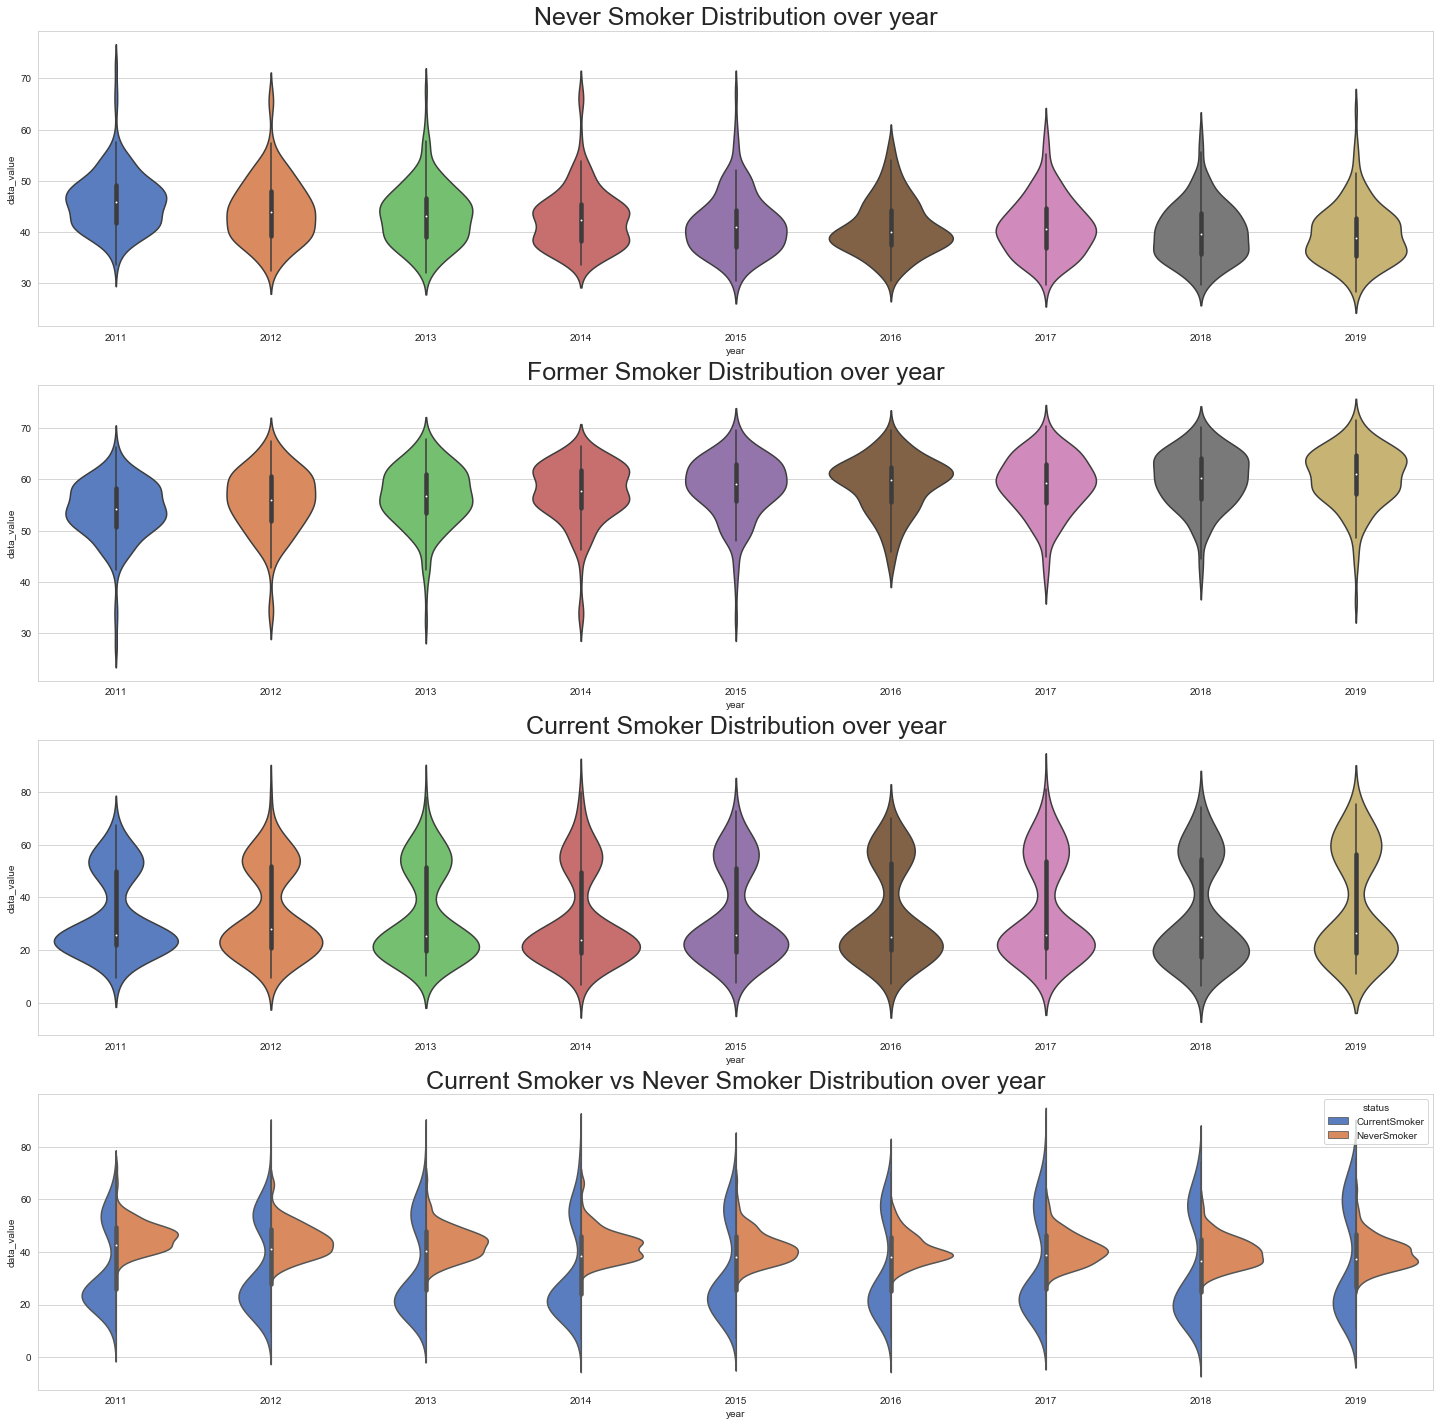

In [17]:
raw1 = pd.read_pickle('cleaned_df1.pkl')
# Current smoker 
CurrentSmoker = raw1.loc[(raw1['topicdesc']=='Cigarette Use (Adults)') & (raw1['measuredesc']=='Smoking Status'),
                  ['year','locationabbr','data_value','sample_size','gender']]
CurrentSmoker['status'] = 'CurrentSmoker'

# Former smoker: Among persons who have ever smoked cigarettes, those who do not currently smoke cigarettes.
FormerSmoker = raw1.loc[(raw1['topicdesc']=='Cessation (Adults)') & (raw1['measuredesc']=='Percent of Former Smokers Among Ever Smokers'),
                  ['year','locationabbr','data_value','sample_size','gender']]
FormerSmoker['status'] = 'FormerSmoker'

# Never smoker: remaining sample from the above dataset
NeverSmoker = FormerSmoker.copy()
NeverSmoker['data_value'] = 100 - NeverSmoker['data_value']
NeverSmoker['status'] = 'NeverSmoker'


# merge 3 dataframe into 1 df
SmokerStatusdf = pd.concat([CurrentSmoker,FormerSmoker], axis=0)
SmokerStatusdf = pd.concat([SmokerStatusdf,NeverSmoker], axis=0)
#calculate the number of people from percentage
SmokerStatusdf['number'] = 0.01*SmokerStatusdf['data_value']*SmokerStatusdf['sample_size']

# Visualize different smoker status distribution
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(25, 25))

sns.violinplot(x = NeverSmoker['year'],y=NeverSmoker['data_value'], points=120, widths=0.3,palette="muted",
                      showmeans=True, showextrema=True, showmedians=True,ax=axes[0]);
axes[0].set_title("Never Smoker Distribution over year",fontsize=25);

sns.violinplot(x = FormerSmoker['year'],y=FormerSmoker['data_value'], points=120, widths=0.3,palette="muted",
                      showmeans=True, showextrema=True, showmedians=True,ax=axes[1]);
axes[1].set_title("Former Smoker Distribution over year",fontsize=25);

sns.violinplot(x = CurrentSmoker['year'],y=CurrentSmoker['data_value'],points=120, widths=0.3,palette="muted",
                      showmeans=True, showextrema=True, showmedians=True,ax=axes[2]);
axes[2].set_title("Current Smoker Distribution over year",fontsize=25);

sns.violinplot(x='year',y='data_value',data=SmokerStatusdf.loc[SmokerStatusdf.status != 'FormerSmoker'],hue='status',split=True,palette="muted",ax = axes[3]);
axes[3].set_title("Current Smoker vs Never Smoker Distribution over year",fontsize=25);

based on the graphs generated above, showing the trend of 3 smoker categories. Never Smoker has a generally clear decreasing trend over years, former smoker also shows a slightly increasing trend, and current smoker trend is pretty constant based on this graph, which can be explained by the smoking behavior can be treated as a habit that is hard to give up. Besides, the increase in former smoker trend and the decrease in never smoker trend neutralize the overall effect to the current smoker trend. That's probably why current smoker trend is very stable over years. 

### a.2) Impact of location(state),age, gender, education, race on people's smoking behavior   <a class="anchor" id="section_5_1_2"></a>

**Notice**: Since the original data contains a number of measures for cigarette use, in particular where **Smoking Status** consists of current smoker, former smoker and never smoker. The current smoker data can be included into **Current Smoking** measure, where former and never smokers should be eliminated when we assess the current cigarette use rate.

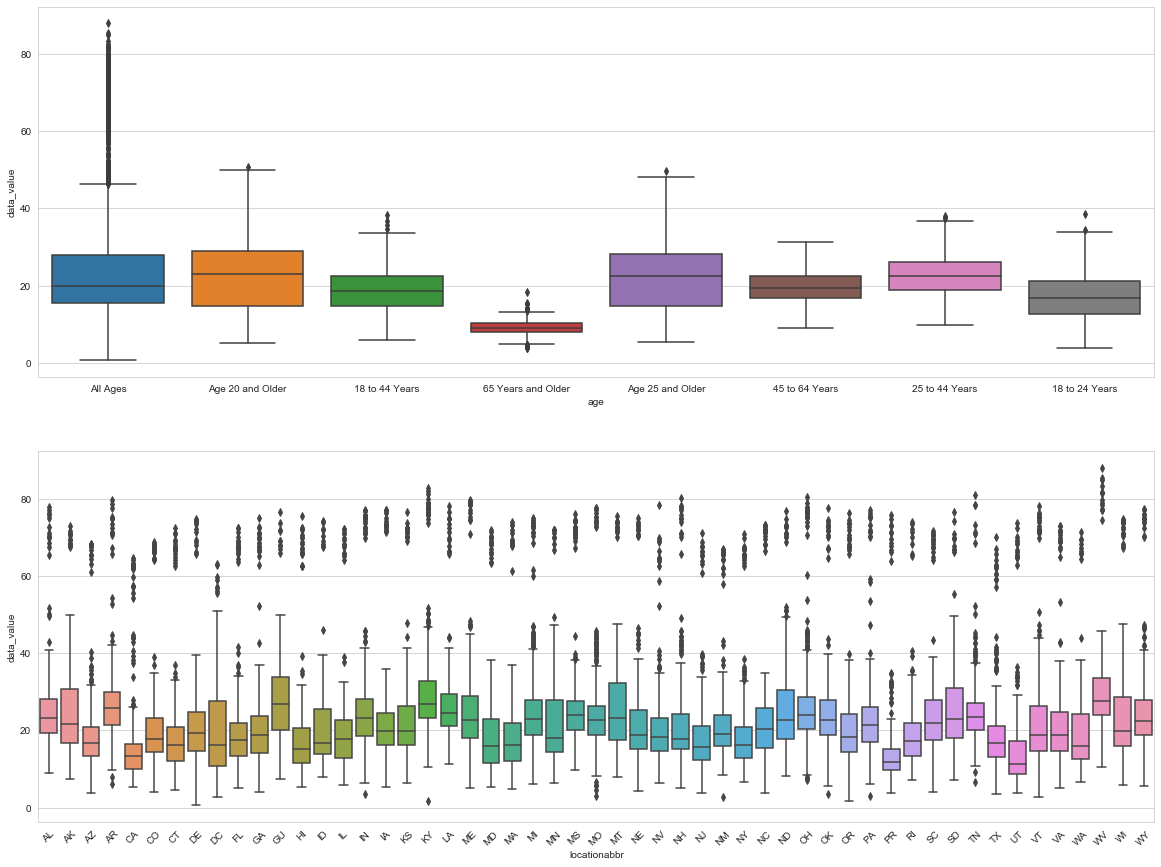

In [18]:
df_cig = df1.loc[df1.topicdesc=="Cigarette Use (Adults)"].sort_values(by=["locationdesc"])
df_cig = df_cig.loc[df_cig.response != "Former"].loc[df_cig.response != "Never"]
df_cig['count'] = (df_cig['data_value']*0.01)*df_cig['sample_size']

df_cgroup = df_cig.groupby(['year','locationabbr'])['count','sample_size'].agg([np.sum])
df_cgroup.reset_index(inplace=True)

fig, ax = plt.subplots(2,1, figsize=(20,15))
sns.boxplot(x="age", y="data_value", data=df_cig, ax=ax[0])
sns.boxplot(x="locationabbr", y="data_value", data=df_cig, ax=ax[1])
plt.xticks(rotation=45)
plt.show()

Since the original **data_value** gives only the proportion of the sample size, if we directly visualise with this data, above two figures show there are a lot of outliers. There are also overlapping categories such as **All ages** and **All Grades**, which overlaps with others. This makes it difficult to directly sense the relationship between the cigarette use proportion and other variables. So we need to calculate the exact number of people smoking at each row and sum up by using groupby over specific categories and use only part of the data. The next map plot gives an intuition how cigarette consumption is distributed over different states.

In [19]:
df_state = df_cgroup.groupby("locationabbr").sum()
df_state["perc"] = df_state["count"]/df_state["sample_size"]
tobacco_state = np.asarray(df_state['perc'])
us_states = np.sort(np.asarray(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
                        "GU", 
                        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
                        'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
                        'NC', 'ND', 'OH', 'OK', 'OR', 'PA', "PR",'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']))
fig = go.Figure(data=go.Choropleth(
    locations = us_states, # Spatial coordinates
    z = tobacco_state.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    marker_line_color='white',
    colorbar_title = "Cigarette use proportion",
))

fig.update_layout(
    title_text = 'Average cigarette use by adults of different states in USA from 2010-2019 overall',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In the above plot we quantified the adults cigarette use percentage by averaging all data over the 10 years. It is surprsing that cigarette consumption on different states can distinguish significantly from around $10\%$ in UT and $27\%$ in KY. This may be explained by different policies and living habits of the states. One insightful point may be that KY is one of the lowest cigarette-taxed states in USA, where it is taxed 1.10 USD per pack, compared with the national average of 1.81 USD (https://igentax.com/cigarette-tax-state/). Also, it will be interesting to sense how other factors can impact the smoking rate.

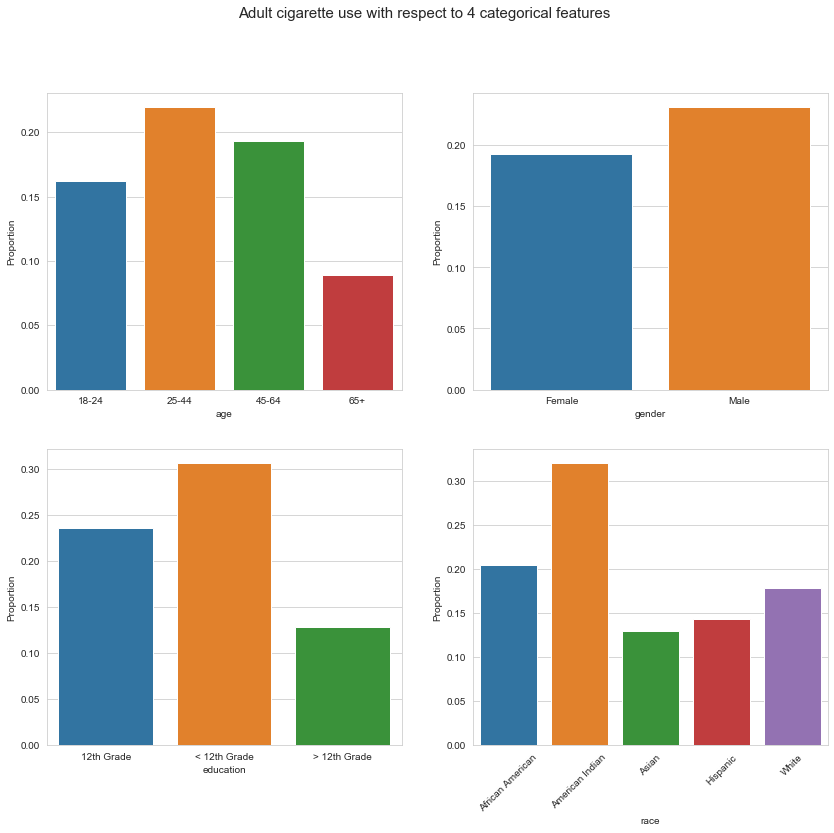

In [40]:
fig, ax = plt.subplots(2,2,figsize=(14,12))
df_agegroup = df_cig.groupby(["age"])['count','sample_size'].agg([np.sum])
df_agegroup.reset_index(inplace=True)
df_agegroup = df_agegroup[:5]
df_agegroup = df_agegroup.drop(index=1, axis=1)
df_agegroup["Proportion"] = df_agegroup["count"]/df_agegroup["sample_size"]
sns.barplot(x="age", y="Proportion", data=df_agegroup, ax=ax[0][0])
labels = ['18-24', '25-44', '45-64', "65+"]
ax[0][0].set_xticklabels(labels)


df_gendgroup = df_cig.groupby(["gender"])['count','sample_size'].agg([np.sum])
df_gendgroup.reset_index(inplace=True)
df_gendgroup = df_gendgroup[:2]
df_gendgroup["Proportion"] = df_gendgroup["count"]/df_gendgroup["sample_size"]
sns.barplot(x="gender" ,y="Proportion", data=df_gendgroup, ax=ax[0][1])

df_edugroup = df_cig.groupby(["education"])['count','sample_size'].agg([np.sum])
df_edugroup.reset_index(inplace=True)
df_edugroup = df_edugroup[:3]
df_edugroup["Proportion"] = df_edugroup["count"]/df_edugroup["sample_size"]
sns.barplot(x="education",y="Proportion", data=df_edugroup, ax=ax[1][0])

df_racegroup = df_cig.groupby(["race"])['count','sample_size'].agg([np.sum])
df_racegroup.reset_index(inplace=True)
df_racegroup.drop(index=1, axis=1, inplace=True)
df_racegroup["Proportion"] = df_racegroup["count"]/df_racegroup["sample_size"]
sns.barplot(x="race",y="Proportion", data=df_racegroup, ax=ax[1][1])
labels1 = ["African American", "American Indian", "Asian", "Hispanic", "White"]
ax[1][1].set_xticklabels(labels1, rotation=45)
fig.suptitle('Adult cigarette use with respect to 4 categorical features', fontsize=15)

plt.show()

We can roughly conclude that a male, who is 25-44 years old or 45-64 years old and is American Indian and has education of less than 12th grade, is more likely to engage in smoking behaviors. One remarkable phenomenon we find out from the last graph is that 18-24 years old teenagers has a huge decrease in activity of smoking from 2011 to 2019. This can be explained by the teenagers' education through high school, improving standards of living (which means they can do a lot of other things to have fun), etc

### Possible predictive capability of categorical features

It seems all four features matter on smoking rate, but which is the most important one? As mentioned in the beginning of this section, due to the limit of the data, it is hard and unfair to directly analyse the smoking rate row-by-row, which is associated by the sample size and can vary significantly within the same state. However, by using quantitative methods, we could more or less reflect the predictive power of the features. Next we will define a function to calculate the p-values and the disparity scores of the features. Higher the disparity score or lower the p-value indicates the stronger predictive power.

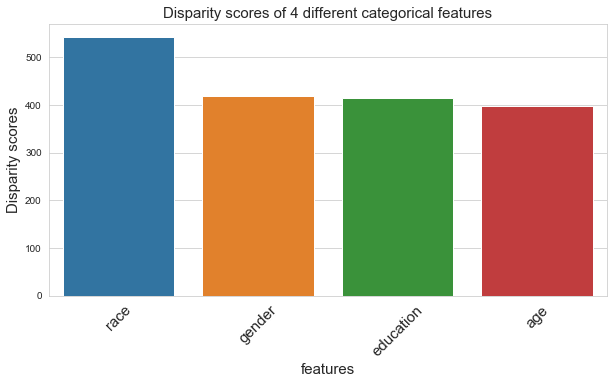

The p-values and disparity scores:
    features           pval   disparity
3       race  3.380247e-236  542.192133
1     gender  1.258918e-182  418.840234
2  education  1.612117e-180  413.987768
0        age  9.782739e-174  398.369187


In [54]:
fig,ax=plt.subplots(figsize=(10,5))
cat = ["age","gender","education","race"]
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['data_value'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data= df_cig[cat]
cat_data['data_value'] = df_cig.data_value.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity', ax=ax) 
ax.set_title("Disparity scores of 4 different categorical features",fontsize=15)
ax.set_xlabel("features", fontsize=15)
ax.set_ylabel("Disparity scores", fontsize=15)
plt.xticks(rotation=45,fontsize=15) 
plt.show()
print("The p-values and disparity scores:")
print(k)

Theoretically, it is not feasible to carry out a test like this for the data, but we did it here in a comparative way. The results are not perfectly mapped to previous analysis. However, it seems race is indeed a more significant influencer than others, in both plots.

### a.3) Adults Smoking Behavior Trend Over Years <a class="anchor" id="section_5_1_3"></a>

In the above analysis, we explored the data in an overall perspective by averaging data over 10 years. However, an important question comes forth: what is the trend of the phenomenon? Do American people smoke more or smoke less during the last decade? Since **Smoking Harms** is labelled on every pack of cigarette, governments also tried various policies to control the smoking rate. Nevertheless, cigaretee is not legally banned and is also widely accessible to adults, it will be interesting to investigate the trends of the cigarette consumption.

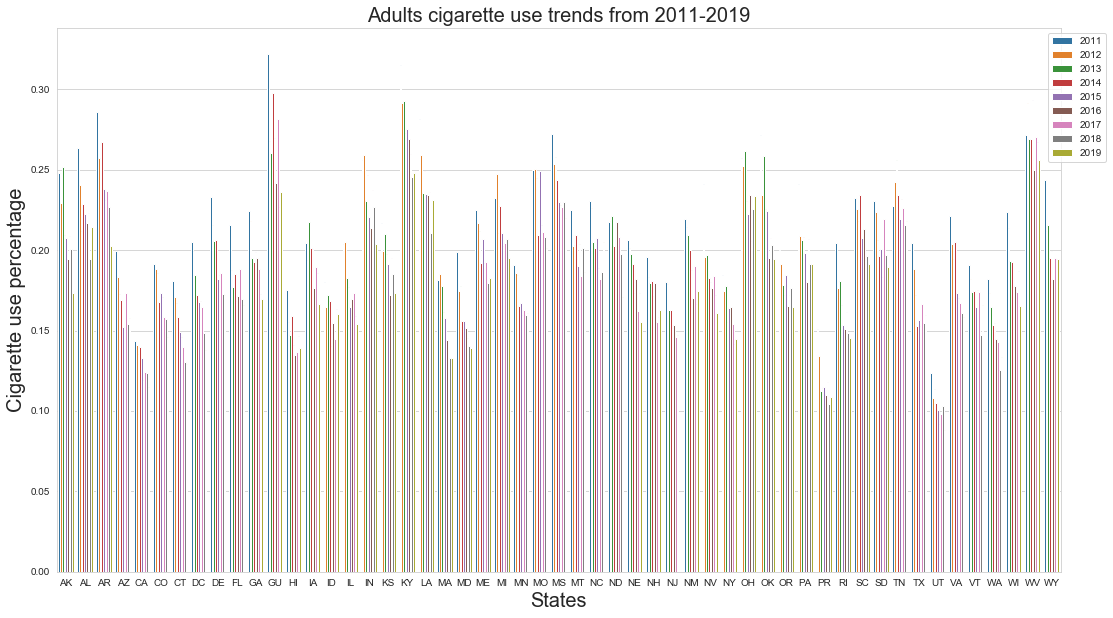

In [22]:
df_cgroup1 = df_cgroup.loc[df_cgroup.year.apply(lambda x: len(x))<5]
df_cgroup1["perc"] = df_cgroup1["count"]/df_cgroup1["sample_size"]

fig, ax = plt.subplots(figsize=(18,10))
# the size of A4 paper
sns.color_palette()
sns.barplot(x="locationabbr", y="perc", hue="year", data=df_cgroup1, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel("States", fontsize=20)
ax.set_ylabel("Cigarette use percentage",fontsize=20)
ax.set_title("Adults cigarette use trends from 2011-2019", fontsize=20)
#plt.xticks(rotation=90)
sns.set_style("whitegrid")
plt.show()

The above barplot also explained the previous map figure that cigarette use in different states can be vary a lot. Additionally, some states saw a decreasing trend over the 10 years while others states' figure fluctuated. We are curious about the change between the 10-year period, did people smoke less in 2019 compared to 2011? This motivates to give the next figure.

In [23]:
df_2011 = df_cgroup.loc[df_cgroup.year=="2011"]
df_2011 = df_2011.loc[df_2011.locationabbr!="NJ"]
df_2011["perc"] = df_2011["count"]/df_2011["sample_size"]

df_2019 = df_cgroup.loc[df_cgroup.year=="2019"]
df_2019["perc"] = df_2019["count"]/df_2019["sample_size"]

change = df_2019.perc.values - df_2011.perc.values

us_states_change = np.sort(np.asarray(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
                        "GU", 
                        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
                        'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NM', 'NY',
                        'NC', 'ND', 'OH', 'OK', 'OR', 'PA', "PR",'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']))
fig1 = go.Figure(data=go.Choropleth(
    locations = us_states_change, # Spatial coordinates
    z = change.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'RdBu',
    marker_line_color='white',
    colorbar_title = "Cigarette use change",
))

fig1.update_layout(
    title_text = 'Adults cigarette use change over the 10-year period',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig1.show()

This map shows people smoked less in 2019 compared to that in 2011 in all states, and this trend was also spotted in the last barplot. In most states, smoking rates were moderately decreased, while only a few states changed slightly.

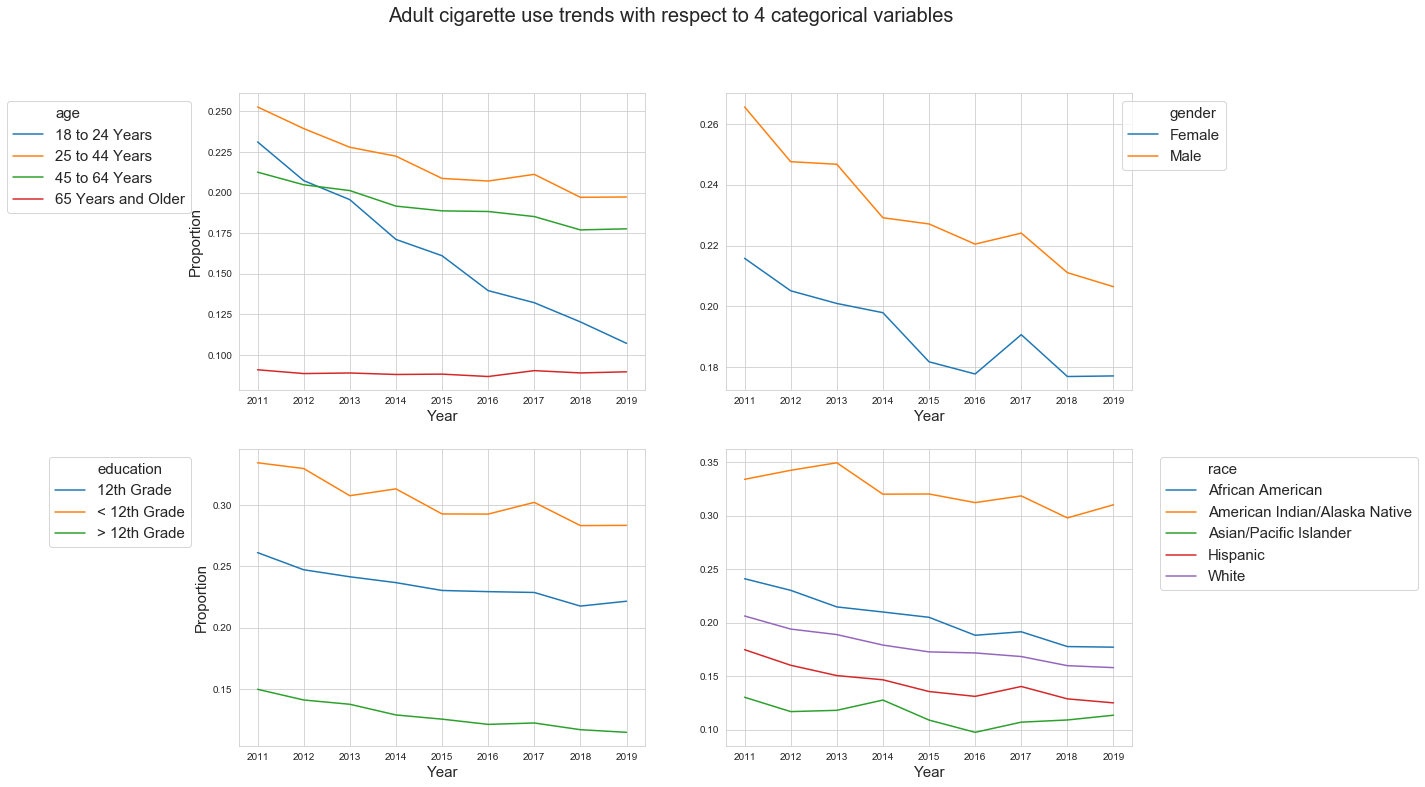

In [24]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

df_agegroup = df_cig.groupby(["year","age"])['count','sample_size'].agg([np.sum])
df_agegroup.reset_index(inplace=True)
df_agegroup = df_agegroup.loc[(df_agegroup.year.apply(lambda x: len(x))<5)]
df_agegroup = df_agegroup.loc[df_agegroup.age!="All Ages"]
df_agegroup = df_agegroup.loc[df_agegroup.age!="18 to 44 Years"]
df_agegroup = df_agegroup.loc[df_agegroup.age!="Age 20 and Older"]
df_agegroup = df_agegroup.loc[df_agegroup.age!="Age 25 and Older"]
df_agegroup["Proportion"] = df_agegroup["count"]/df_agegroup["sample_size"]
sns.lineplot(x="year", y="Proportion", hue="age",data=df_agegroup, ax=ax[0][0])

df_gendgroup = df_cig.groupby(["year","gender"])['count','sample_size'].agg([np.sum])
df_gendgroup.reset_index(inplace=True)
df_gendgroup = df_gendgroup.loc[(df_gendgroup.year.apply(lambda x: len(x))<5)]
df_gendgroup = df_gendgroup.loc[df_gendgroup.gender!="Overall"]
df_gendgroup["Proportion"] = df_gendgroup["count"]/df_gendgroup["sample_size"]
sns.lineplot(x="year" ,y="Proportion", hue="gender",data=df_gendgroup, ax=ax[0][1])

df_edugroup = df_cig.groupby(["year", "education"])['count','sample_size'].agg([np.sum])
df_edugroup.reset_index(inplace=True)
df_edugroup = df_edugroup.loc[(df_edugroup.year.apply(lambda x: len(x))<5)]
df_edugroup = df_edugroup.loc[df_edugroup.education!="All Grades"]
df_edugroup["Proportion"] = df_edugroup["count"]/df_edugroup["sample_size"]
sns.lineplot(x="year",y="Proportion", hue="education",data=df_edugroup, ax=ax[1][0])

df_racegroup = df_cig.groupby(["year", "race"])['count','sample_size'].agg([np.sum])
df_racegroup.reset_index(inplace=True)
df_racegroup = df_racegroup.loc[(df_racegroup.year.apply(lambda x: len(x))<5)]
df_racegroup = df_racegroup.loc[df_racegroup.race!="All Races"]
df_racegroup["Proportion"] = df_racegroup["count"]/df_racegroup["sample_size"]
sns.lineplot(x="year",y="Proportion", hue="race",data=df_racegroup, ax=ax[1][1])

for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel("Year", fontsize=15)
        if j==0:
            ax[i][j].set_ylabel("Proportion", fontsize=15)
        else:
            ax[i][j].set_ylabel(None)

ax[0][0].legend(bbox_to_anchor=(-0.1, 1), fontsize=15)
ax[0][1].legend(bbox_to_anchor=(1.25, 1), fontsize=15)
ax[1][0].legend(bbox_to_anchor=(-0.1, 1), fontsize=15)
ax[1][1].legend(bbox_to_anchor=(1.05, 1), fontsize=15)

fig.suptitle('Adult cigarette use trends with respect to 4 categorical variables', fontsize=20)

plt.show()

**Summary of findings**  \
Anaylsis in this section suggests Smoking Behaviors was linked to people's attributes. This is evidenced by:

1. Higher proportion of male will engage in smoking 
2. Southeast/northeast region of U.S. are more likely to smoke than other regions in U.S.
3. Education will affect people's smoking behavior. less educated adults smoke more often than more educated adults. 
4. 25-44 years old or 45-64 years old adults smoke more often than other ages. 
5. Overall adults smoking rate decreased in the last decade, some states such as NV and OK saw significant drop on the figure with around 7\%, while most states decreased the smoking rate at below 5\%.
6. Young people aged 18-24 years smoked significantly less over the decade, with the figure in 2019 was less than a half of that in 2011.

<h3> b. Objective 2: Relationship between Cigarette Smoking and Chronic Disease </h3> <a class="anchor" id="section_5_2"></a>

At this part we will explore the correlation between the cigarette smoking rate and the three common diseases rate on a state-wise manner. Since in the last section we have shown cigarette use distinguishes over states, do those states with higher cigarette smoking proportion indicate being riskier for other diseases? If so, is there any lag effect? For example, smoking will not usually cause effect immediately, instead it gradually damages our respiratory system and immune system and then invoke other chronical diseases such as heart disease. It is engaging to explore this phenomenon.

### b.1) Smoking vs Cardiovascular Disease <a class="anchor" id="section_5_2_1"></a>

In [25]:
# data cleaning for later combining data of smoking and data of heart disease
raw2 = pd.read_pickle('cleaned_df2.pkl')
df2 = raw2.groupby(['year','locationabbr','gender'])['percentage',"data_value"].agg([np.mean])
df2.reset_index(inplace=True)
df2.columns = ['year','state','gender','percentage',"number"]
df2 =  df2.loc[(df2.state!="AS")&(df2.state!="MP")&(df2.state!="NJ")&(df2.state!="US")&(df2.state!="VI")]

df2_state = df2.groupby(["state"]).agg([np.mean])

fig_HD = go.Figure(data=go.Choropleth(
    locations = us_states_change, # Spatial coordinates
    z = df2_state.number.values.squeeze(), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    marker_line_color='white',
    colorbar_title = "Heart disease number per 100k",
))

fig_HD.update_layout(
    title_text = 'Average heart disease number on USA from 2013-2018 ',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig_HD.show()

The heart disease graph shows that the southeast region of U.S. are exposed to more heart disease, and this phenomenon has the overlap with the map graph of "Average cigarette use by adults of different states in USA from 2010-2019 overall", which also shows southeast region of U.S. have more cigarette than other regions. To verify this, we calculate the overall correlation between the two features and a year-wise correlation map to inspect the time effect.

In [11]:
df_allyear = pd.DataFrame({"state": np.sort(us_states_change), 
                           "Cig_perc":df_state.loc[df_state.index!="NJ"].perc,
                           "HD_number":df2_state.number.values.squeeze()})[["Cig_perc", "HD_number"]]
df_allyear.corr()

Cig_perc  HD_number
Cig_perc   1.000000   0.736191
HD_number  0.736191   1.000000

state  Cig_perc2011  Cig_perc2012  Cig_perc2013  Cig_perc2014  Cig_perc2015  \
0    AK      0.248095      0.229206      0.251946      0.209428      0.207562   
1    AL      0.263769      0.240558      0.211919      0.228825      0.222282   
2    AR      0.285956      0.257054      0.257521      0.267216      0.237700   
3    AZ      0.199721      0.183141      0.172580      0.169204      0.152292   
4    CA      0.143615      0.140728      0.135545      0.140019      0.133157   

   Cig_perc2016  Cig_perc2017  Cig_perc2018  HD_number2013  HD_number2014  \
0      0.194632      0.208824      0.200826     289.678393     309.317721   
1      0.216556      0.222952      0.194772     471.358333     477.953431   
2      0.231068      0.237042      0.226581     452.655263     456.401754   
3      0.151891      0.173425      0.153953     292.179167     287.862500   
4      0.118976      0.124249      0.123614     309.552542     307.418079   

   HD_number2015  HD_number2016  HD_number2017  HD_number2018  
0     312.403934     306.962203     282.310093     265.268630  
1     475.603431     476.975490     471.810294     468.695588  
2     459.634649     463.667105     456.085088     452.364474  
3     289.027083     289.345833     289.160417     284.312500  
4     302.132768     303.494915     296.124294     290.955367

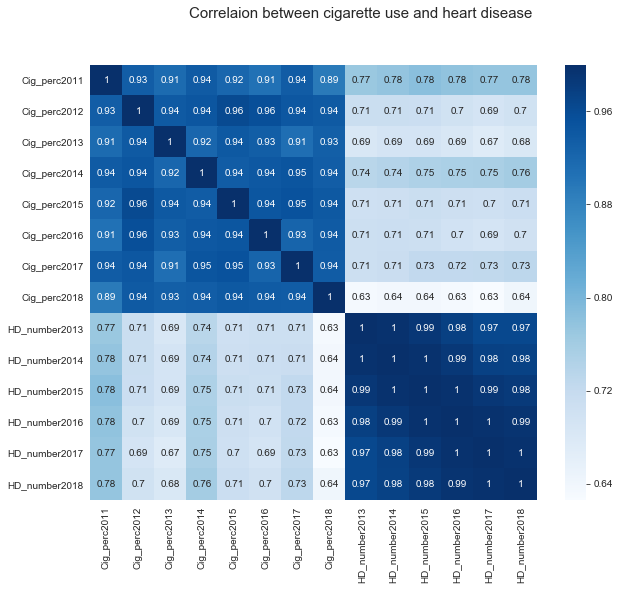

In [56]:
df2_ys = df2.groupby(["year","state"]).agg([np.mean])
df2_ys.reset_index(inplace=True)

df_2year = pd.DataFrame({"state":np.sort(us_states_change), "Cig_perc2011":df_2011.perc})

for i in np.arange(2012,2019):
    Cigdf = df_cgroup.loc[df_cgroup.year==str(i)]
    if Cigdf.shape[0] > 52:
        Cigdf = Cigdf.loc[Cigdf.locationabbr!="NJ"]
    Cigdf["perc"] = Cigdf["count"]/Cigdf["sample_size"]
    df_2year[f"Cig_perc{i}"] = Cigdf.perc.values

for i in np.arange(2013,2019):
    df_2year[f"HD_number{i}"] = df2_ys.loc[df2_ys.year==str(i)].number.values.squeeze()

display(df_2year.head(5))
fig, ax = plt.subplots(figsize=(10,8))
cor = df_2year.corr()
sns.heatmap(cor, cmap="Blues", annot=True,ax=ax)
fig.suptitle('Correlaion between cigarette use and heart disease', fontsize=15)
plt.show()

We only consider the figure on those entries where the year of HD_number is more recent to the year of Cig_perc. We can find the cigarette use statistics in 2011 has the highest correlation to heart disease in the subsequent years, while smoking data in 2018 has the lowest correlation. However, we cannot witness a clear lag effect from the data, we believe there are complicated causal effects and it is not a simple year-to-year relationship. Furthermore, this kind of chronic diseases can usually last a long time for years, patients with heart disease begining in 2015 may continue to report having it for the following years, this caused overlapping data among years.

### b.2) Smoking vs Pulmonary Disease <a class="anchor" id="section_5_2_2"></a>

In [27]:
df3 = pd.read_pickle('cleaned_df3.pkl')
df3 = df3.loc[(df3.yearstart!="2010")&(df3.yearstart!="2011")&(df3.yearstart!="2012")]

df_p = df3[["locationabbr", "datavalue"]]
df_p = df_p.groupby("locationabbr").mean()
nonstate = [state for state in df_p.index if state not in us_states_change]
for state in nonstate:
    df_p.drop(index=state, inplace=True)
new_states = np.array(df_p.index)

figp = go.Figure(data=go.Choropleth(
    locations = new_states, # Spatial coordinates
    z = df_p.datavalue.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    marker_line_color='white',
    colorbar_title = "Number of pulmonary diseases per 1000 ",
))

figp.update_layout(
    title_text = 'Average pulmonary diseases cases in USA from 2013-2018 ',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

figp.show()

An obvious pattern on the map is that KY has the highest rate while UT having the lowest rate. Along with the light-colored northwest of USA, this is very similar to cigarette use map, indicating some relationship between the two. 

In [13]:
df_allp = pd.DataFrame({"state": new_states, 
                   "Cig_perc":df_state.loc[(df_state.index!="NJ")&(df_state.index!="GU")&(df_state.index!="PR")].perc,
                    "PM_number":df_p.datavalue.values})[["Cig_perc", "PM_number"]]
#display(df_allyear.head(5))
df_allp.corr()

Cig_perc  PM_number
Cig_perc   1.000000   0.580185
PM_number  0.580185   1.000000

state  Cig_perc2011  Cig_perc2012  Cig_perc2013  Cig_perc2014  Cig_perc2015  \
0    AK      0.248095      0.229206      0.251946      0.209428      0.207562   
1    AL      0.263769      0.240558      0.211919      0.228825      0.222282   
2    AR      0.285956      0.257054      0.257521      0.267216      0.237700   
3    AZ      0.199721      0.183141      0.172580      0.169204      0.152292   
4    CA      0.143615      0.140728      0.135545      0.140019      0.133157   

   Cig_perc2016  Cig_perc2017  Cig_perc2018  PM_number2013  PM_number2014  \
0      0.194632      0.208824      0.200826      27.108333      27.007083   
1      0.216556      0.222952      0.194772      67.566786      60.677692   
2      0.231068      0.237042      0.226581      50.131538      47.798846   
3      0.151891      0.173425      0.153953      41.682812      41.114333   
4      0.118976      0.124249      0.123614      41.802812      39.820000   

   PM_number2015  PM_number2016  PM_number2017  PM_number2018  
0      27.680417      29.461667      30.745417      28.378750  
1      65.213462      65.975385      72.010385      73.386154  
2      49.825000      48.353462      53.719615      52.118462  
3      41.102333      42.409667      40.813438      40.192000  
4      42.847188      47.055312      49.056563      46.900000

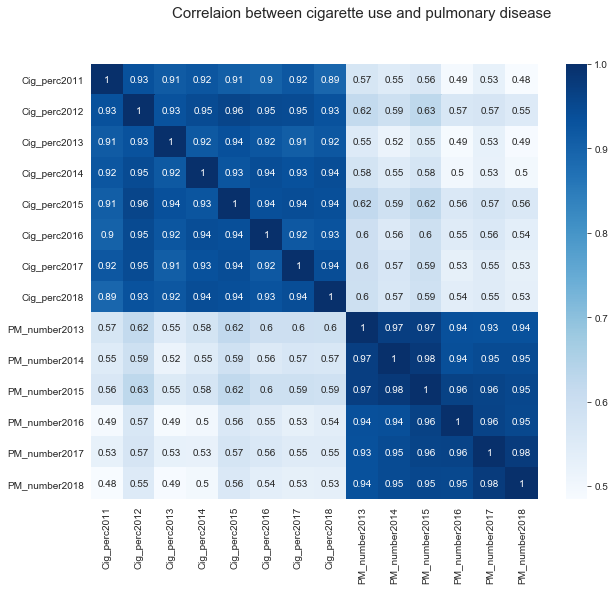

In [52]:
df3_ys = df3.groupby(["yearstart","locationabbr"]).agg([np.mean])
df3_ys.reset_index(inplace=True)
df3_ys = df3_ys.loc[(df3_ys.locationabbr!="NJ")& (df3_ys.locationabbr!="US")]

df_3year = pd.DataFrame({"state":np.sort(new_states)})

for i in np.arange(2011,2019):
    Cigdf = df_cgroup.loc[df_cgroup.year==str(i)]
    Cigdf = Cigdf.loc[(Cigdf.locationabbr!="NJ")&(Cigdf.locationabbr!="GU")&(Cigdf.locationabbr!="PR")]
    Cigdf["perc"] = Cigdf["count"]/Cigdf["sample_size"]
    df_3year[f"Cig_perc{i}"] = Cigdf.perc.values

for i in np.arange(2013,2019):
    df_3year[f"PM_number{i}"] = df3_ys.loc[df3_ys.yearstart==str(i)].datavalue.values.squeeze()

display(df_3year.head(5))
fig, ax = plt.subplots(figsize=(10,8))
cor = df_3year.corr()
sns.heatmap(cor, cmap="Blues", annot=True,ax=ax)

fig.suptitle('Correlaion between cigarette use and pulmonary disease', fontsize=15)
plt.show()

### b.3) Smoking vs Cancer<a class="anchor" id="section_5_2_3"></a>

In [57]:
df4 = pd.read_pickle('cleaned_df4.pkl')
df_c = df4.groupby("locationabbr").mean()
df_c = df_c.drop(index=["NJ","US"])

figc = go.Figure(data=go.Choropleth(
    locations = new_states, # Spatial coordinates
    z = df_c.datavalue.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    marker_line_color='white',
    colorbar_title = "Number of cancer per 100k ",
))

figc.update_layout(
    title_text = 'Average number of cancer in USA from 2012-2017 ',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

figc.show()

In [16]:
df_allc = pd.DataFrame({"state": new_states, 
                   "Cig_perc":df_state.loc[(df_state.index!="NJ")&(df_state.index!="GU")&(df_state.index!="PR")].perc,
                    "Cancer_number":df_c.datavalue.values})[["Cig_perc", "Cancer_number"]]
#display(df_allyear.head(5))
df_allc.corr()

Cig_perc  Cancer_number
Cig_perc       1.000000       0.327086
Cancer_number  0.327086       1.000000

state  Cig_perc2011  Cig_perc2012  Cig_perc2013  Cig_perc2014  Cig_perc2015  \
0    AK      0.248095      0.229206      0.251946      0.209428      0.207562   
1    AL      0.263769      0.240558      0.211919      0.228825      0.222282   
2    AR      0.285956      0.257054      0.257521      0.267216      0.237700   
3    AZ      0.199721      0.183141      0.172580      0.169204      0.152292   
4    CA      0.143615      0.140728      0.135545      0.140019      0.133157   

   Cig_perc2016  Cig_perc2017  Cig_perc2018  PM_number2012  PM_number2013  \
0      0.194632      0.208824      0.200826      79.643011      78.223936   
1      0.216556      0.222952      0.194772      77.752551      76.382653   
2      0.231068      0.237042      0.226581      80.845455      80.103000   
3      0.151891      0.173425      0.153953      61.636726      61.445133   
4      0.118976      0.124249      0.123614      59.762810      58.997107   

   PM_number2014  PM_number2015  PM_number2016  PM_number2017  
0      76.546809      74.203723      73.704787      72.694681  
1      74.843939      73.844500      73.985000      73.871000  
2      80.024257      81.044059      81.281188      79.832524  
3      59.548276      60.447368      60.195175      59.360435  
4      58.157025      57.599587      56.833471      56.315289

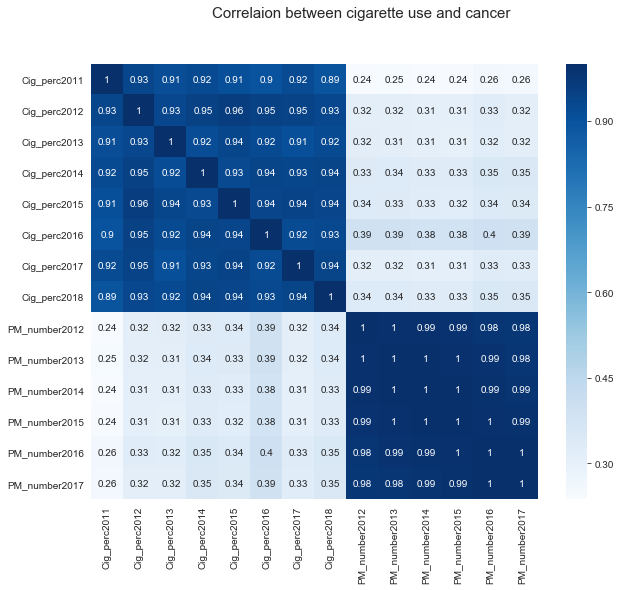

In [55]:
df4_ys = df4.groupby(["yearend","locationabbr"]).agg([np.mean])
df4_ys.reset_index(inplace=True)
df4_ys = df4_ys.loc[(df4_ys.locationabbr!="NJ")& (df3_ys.locationabbr!="US")]

df_4year = pd.DataFrame({"state":np.sort(new_states)})

for i in np.arange(2011,2019):
    Cigdf = df_cgroup.loc[df_cgroup.year==str(i)]
    Cigdf = Cigdf.loc[(Cigdf.locationabbr!="NJ")&(Cigdf.locationabbr!="GU")&(Cigdf.locationabbr!="PR")]
    Cigdf["perc"] = Cigdf["count"]/Cigdf["sample_size"]
    df_4year[f"Cig_perc{i}"] = Cigdf.perc.values

for i in np.arange(2012,2018):
    df_4year[f"PM_number{i}"] = df4_ys.loc[df4_ys.yearend==str(i)].datavalue.values.squeeze()

display(df_4year.head(5))
fig, ax = plt.subplots(figsize=(10,8))
cor = df_4year.corr()
sns.heatmap(cor, cmap="Blues", annot=True,ax=ax)
fig.suptitle('Correlaion between cigarette use and cancer', fontsize=15)
plt.show()

Summarizing all of above charts in b.1), b.2 and b.3), Cardiovascular disease seems to have the highest correlation with smoking. This is also soundful and meet our expectation since Cardiovascular disease is the most frequent disease caused by smoking worlwide based on CDC's statistics. Pulmonary disease and especially cancer have few cases compared to other diseases,  therefore, their correlation tends to be fairly low. However, we need to weight cancer much more than it shows. This insight motivate us to continue the analysis in the next part. 

### b.4) Relation among smoking and 3 diseases <a class="anchor" id="section_5_2_4"></a>

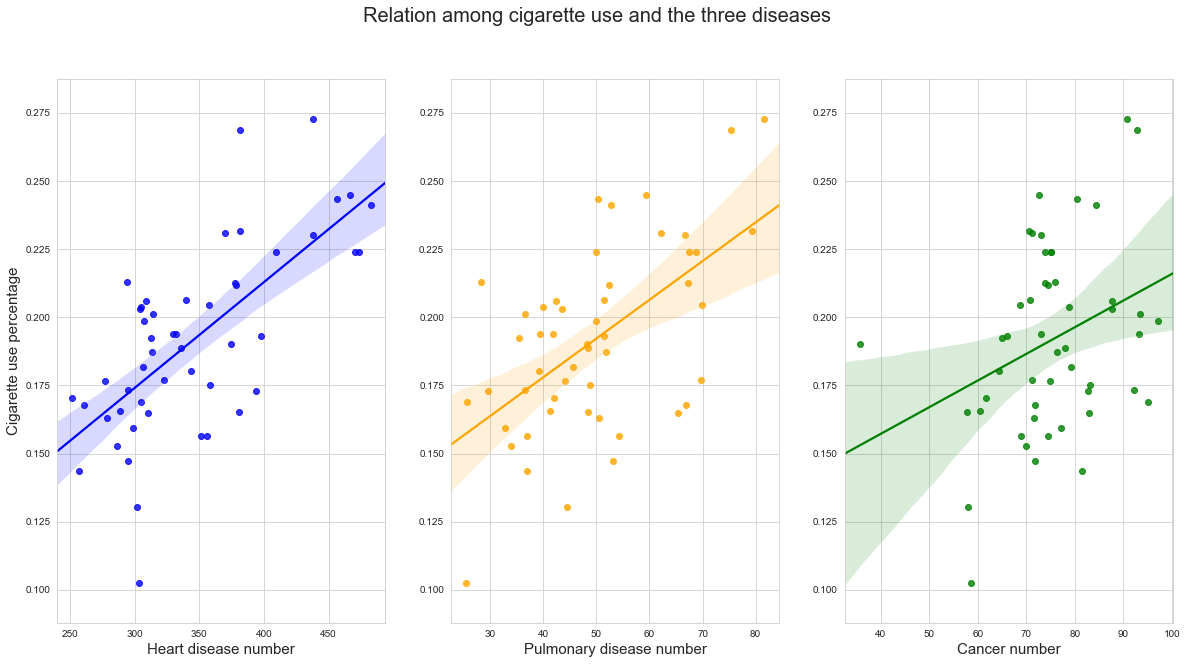

In [27]:
nn = df_allp
nn["HD_number"] = df_allyear.drop(index=["GU", "PR"]).HD_number
nn["Cancer_number"] = df_allc["Cancer_number"]

fig, ax = plt.subplots(1,3, figsize = (20,10))

sns.regplot(x="HD_number", y='Cig_perc', data=nn, ax=ax[0],color="blue")
sns.regplot(x="PM_number", y='Cig_perc', data=nn, ax=ax[1],color="orange")
sns.regplot(x="Cancer_number", y='Cig_perc', data=nn, ax=ax[2],color="green")


ax[0].set_xlabel("Heart disease number", fontsize=15)
ax[1].set_xlabel("Pulmonary disease number", fontsize=15)
ax[2].set_xlabel("Cancer number", fontsize=15)

ax[0].set_ylabel("Cigarette use percentage", fontsize=15)
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)

fig.suptitle('Relation among cigarette use and the three diseases', fontsize=20)
plt.show()

In [28]:
features = ["PM_number", "HD_number", "Cancer_number"]
scores = []
for feature in features:
    X = nn["Cig_perc"].values.reshape(-1,1)
    y = nn[feature].values
    reg = LinearRegression().fit(X, y)
    scores.append(reg.score(X, y))

**$R^2$ of the three models**:

||Heart disease|Pulmonary disease|Cancer|
|-|-|-|-|
|$R^2$:|0.47|0.34|0.11|

**Summary of findings** \
The regression analysis did not fit the relationship between disease and cigarette use very well since there are many outliers, we can generally conclude that there's a nolinear relationship between them. However, indicated by the score ($R^2$) of the three models, heart disease is the most likely outcome that can potentially caused by smoking cigarette. This correspondes to our finding in the last part where heart disease has the highest overall correlation value. And the cancer plot is not a good fit with high variance and more outliers, as well as the lowest model $R^2$, this is expected since cigarette should not be that fatal.

<h1> Conclusion </h1> <a class="anchor" id="chapter6"></a>

From the above analysis, Two primary conclusions can be reached:

1. Attributes like age, education, and geographic location etc can affect adults' behavior in cigarette use.
2. There are obvious positive relationship between smoking and chronic diseases including pulmonary disease, cardiovascular disease, and weak relationship between smoking and cancer. 